## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# _Project Title_


### Project participants:

* A. Sian Carey (mm16s4c@leeds.ac.uk)
* B. Student (bstudent@leeds.ac.uk)
* C. Student (cstudent@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

Our dataset is a Spotify dataset containing over 160,000 songs from 1921 to 2020. [Reference]
For each song in the dataset there are nineteen different features, split into four groups by the type of value they contain. Four of the features are categorical, for example the name of the song and the artist. Two of the features are dummies, for example whether the song has explicit content. With this feature a song has a zero here if it does not contain explicit content and a one if it does contain explicit content. The third type contains only one feature that does not fit anywhere else, partly because this feature is how all the other features are recognised as belonging to the same song within Spotify’s database. This feature is the Spotify song ID. The final type is where the majority of the features are, these are all the features that take numerical inputs. There are a range of features in here, from track length measured in milliseconds to danceability. As are a few other features, the danceability of a sing is defined by Spotify as a number between zero and one, where zero is no danceability and one is lots of danceability. This number is made by considering a range of features in the music including the tempo (speed) of the music, the strength of the beat and how regular the song is. However, we do not have access to these features so will just be using their combination found under danceability. 

This data is fairly accurate. It has been collated from data available from Spotify developers, which is officially connected with the Spotify brand. Although it should be noted that due to the lengthy request process to see this data we cannot confirm that the data is the same as that take from Spotify developers. Another issue is that of Spotify itself, as our songs range from 1921 to 2020, however Spotify only started in 2008, which increases the chances of any songs from before 2008 having an incorrect year as there were not uploaded as they were released.

NEED TO TALK ABOUT EMMA'S FILES




## Project Aim and Objectives (5 marks)

The overall aim of our project is to create An interactive program that allows users to search for Spotify songs, artists and genres by using certain features that are assigned to each song, such as how “dancey” they want the music to be or whether the song is explicit. Our project contains searching elements, where the inputted list of songs and related features is searched dependent on the user inputs and returns a list of songs and their artists that are within the boundaries requested by the user. It also contains some query representation, as a user can find genres they might enjoy, by inputting an artist they like. The final main element within our project is a visualisation aspect, users can see a graph outlining the energy, danceability and liveliness of the songs they have been returned. An aspect that we focus on throughout this project is ease of use, with clear and simple directions to the user that can be easily understood. It is also important that we have a robust user interface, so an incorrect input is highlighted, and the user is offered a search again instead of the system breaking. Whilst we will focus on a few user stories when reporting on our project it will also be useable for a much wider range of options.

### Specific Objective(s)

_You should chose and list __up to 3__ specific objectives. 
There should be <b>at least one
per person doing the project</b>. There is no need
for  the objectives them to be completely different. 
They could be different
stages of the processing requirements, or different processing
functions that the system  provides. Or just
different aspects of data analysis that will be conducted.
Typically, it is expected that there would be one objective
per person, but you may do more._

* __Objective 1:__ _Create a set of functions that produce a list of songs similar to a user inputted request_
* __Objective 2:__ _stop global warming using a pandas dataframe_
* __Objective 3:__ _end poverty using matplotlib_

## System Design (5 marks)

_Describe your code in terms of the
following two sections._

### Architecture

_Typically this would be  a pipeline in which data goes through several
stages of transformation and analysis, but other architectures are possible.
This does not need to be particularly complicated. A simple diagram with
100-150 words of explanation would
be a good way to present your architecture._
  
### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them. 
This could include things like:_

* _cleaning the data by removing outliers_
* _combining different datasets_
* _converting samples to a special representaion (such as feature vectors)_
* _constructing a special data-structure (such as a decision tree)_
* _running some kind of analysis_

_Your list can be presented in similar form to the one just given, 
but should include a brief
but more specific description of the components and/or algorithms.
Probably three or four components is sufficient for most projects, but
you may want to have more._

# Program Code (15 marks)


## Import Modules

In [50]:
import pandas  
import math
import matplotlib.pyplot as plt
import numpy as np

The total number of fridge magnets is: 66


**get_csv_data** – Takes the location of a csv file and returns a dataframe of the csv file.

In [ ]:
def get_csv_data(location):

    df = pandas.read_csv(location)
    return df

## Curate a Playlist

In [1]:
relative_data_path = 'data.csv'
features_lst = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']

**validate_user_input** – Takes a string (feature) and returns a string

In [ ]:
def validate_user_input(feature):
    
    while True:
        try: 
            response = input("Please enter a whole number between 0 and 10 to indicate the level of {} in your playlist.\n \n0 = Minimum {} \n10 = Maximum {} \n \nPlease enter a whole number between 0 and 10: ".format(feature,feature,feature))
            print()
                                   
            if response not in ['0','1','2','3','4', '5', '6','7','8','9','10']:
                print("{} is not a whole number between 0 and 10! \nPlease input a whole number between 0 and 10!\n".format(response))
                continue
            break
        except ValueError:
            print("{} is not a whole number between 0 and 10! \nPlease input a whole number between 0 and 10!\n".format(response))
    
    print("You've selected {} out of 10, for {}.\n".format(response, feature))
    feature_weight = int(response)/10
    
    return feature_weight

**validate_selected_features** – Takes a string (feature) and returns a list

In [ ]:
def validate_selected_features(features):
    selected_features = list()
    
    while True:
        try: 
            response = input("Please select which feature you'd like to base your playlist suggestion on.\nIf selecting multiple features, please select the most important one first. Thank you.\n\
                             \n1 = {} \n2 = {} \n3 = {} \n4 = {} \n5 = {} \n6 = {} \n7 = {} \n8 = {} \n9 = {} \n10 = {} \n\nPlease enter one of the number above: ".format(features[0],features[1],features[2],features[3],features[4],features[5],features[6],features[7],features[8],features[9]))
            print()
                                   
            if response not in ['1','2','3','4', '5', '6','7','8','9','10']:
                print("{} is not an option! \nPlease input a whole number between 1 and 10!".format(response))
                continue
            selected_features.append(features[int(response)-1])
            print("You've selected {}.".format(features[int(response)-1]))
            print()
            while True:
                try:
                    again = input("Would you like to select another feature? \nPlease enter yes or no: ")
                    print()
            
                    if again.lower() not in ['yes', 'no']:
                        print("{} is not an option! \nPlease answer with yes or no.\n".format(again))
                        continue
                    break
                except ValueError:
                    print("{} is not an option! \nPlease answer with yes or no.".format(again))
            if again.lower() == 'no':
                break
            else:
                continue
        except ValueError:
            print("{} is not an option! \nPlease input a whole number between 1 and 10!".format(response))
    
    print("Thank you. \n\nYou've selected:\n")
    print()
    
    selected_features_lst = list(dict.fromkeys(selected_features))
    for i in selected_features_lst:
        print(i)
    
    print()
    return selected_features_lst

###### Dataframe sorting and filtering funtions

**sort_by_feature** – Takes a dataframe (df), a string columnnsme (feature) and a boolean (order). The dataframe will be sorted based on feature and the value of order. The sorted dataframe is returned.

In [ ]:
def sort_by_feature(df, feature, order):
    sorted_df = df.sort_values(by=[feature], ascending=order)
    return sorted_df

**data_by_feature_range** – Takes a datframe (df), a string columnname (feature) and two floats (lower_lim, upper_lim). Dataframe is filtered based on feature within a lower and upper value limit. Returns dataframe within the feature limits.

In [ ]:
def data_by_feature_range(df, feature, lower_lim, upper_lim):
    filter_DF = df[(df[feature] >= lower_lim) & (df[feature] <= upper_lim)]
    return filter_DF

**get_selected_feature_value** – Takes dataframe (df), string columnname (feature) and float (percent) value between 0 and 1 representing percent. Returns the selected percentage value of the feature e.g., 40% of 30000 where 40% is represented as 0.4.

In [ ]:
def get_selected_feature_value(df, feature, percent):
    min_val = df[[feature]].min().item()
    max_val = df[[feature]].max().item()
   
    total = max_val - min_val
    feature_percent = total*percent
   
    feature_value = feature_percent+min_val
    
    return feature_value

**find_value_difference** – Takes dataframe (df), string columnname (feature) and float value. Returns the dataframe, wih an extra column, sorted by the difference betweent he float input and the feature value for each song.

In [ ]:
def find_value_difference(df, feature, value):
    difference = []
    for i, row in df.iterrows():
        difference.append(abs(row[feature] - value))
    df['difference'] = difference
    sorted_df = df.sort_values(by=['difference'], ascending = True)
    del sorted_df['difference']
    
    return sorted_df

**reutrn_songs_artist** Function takes a dataframe and prints the songs and respective artists.

In [ ]:
def return_songs_artist(df):
    name_list = df['name'].values.tolist()
    artist_list = df['artists'].values.tolist()
  
    remove_char_lst = ["[", "]", "'"]
    print('–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––')
    for i in range(len(name_list)):
        artist_str = artist_list[i]
        song_str = name_list[i]
        for char in remove_char_lst:
            artist_str = artist_str.replace(char, "")
            song_str = song_str.replace(char, "")
        artists = artist_str.split(", ")
        print(song_str, end = '\n')
        print()
        print('By:')
       
        for j in range(len(artists)):
            print(artists[j])
        print()
        print('–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––')

**validate_num_songs** Function allows the user to say how many songs they would like suggested

In [ ]:
def validate_num_songs():
    while True:
        try:
            value = input("Please enter the number of songs you would like with no spaces, periods or commas.\n\nPlease enter a number: ")
            print()
            
            if not isinstance(int(value), int):
                print("{} is not a whole number! \nPlease input an interger!\n".format(value))
                continue
            if int(value) > 170654:
                print("{} is too big! There are a maximum of 170,654 songs in our database.".format(value))
                continue
            break
        except ValueError:
            print("{} is not a number! \nPlease input a whole number!\n".format(value))
    
    print("You've requested {} songs.\n".format(value))
    num_songs = int(value)
    return num_songs

**validate_explicit** Function below allows the user to pick whether to include explicit songs

In [ ]:
def validate_explicit():
    
    while True:
        try:
            ans = input("Would you like to exclude explicit songs?\n Please enter yes or no: ")
            print()
            if ans.lower() not in ['yes', 'no']:
                print("{} is not an option! \nPlease answer with yes or no.\n".format(again))
                continue
            break
        except ValueError:
            print("{} is not an option! \nPlease answer with yes or no.".format(again))
    
    if ans.lower() == 'yes':
        return True
    else:
        return False

### Curate a Playlist

In [ ]:
Data_DF = get_csv_data(relative_data_path)

metrics = validate_selected_features(features_lst)
not_explicit = validate_explicit()
num_songs = validate_num_songs()

if len(metrics) == 1:
    feature_weight = validate_user_input(metrics[0])
    feature_range = get_selected_feature_value(Data_DF, metrics[0], feature_weight)
    print("Please wait a moment, it may take a few minutes to curate your song selection.\n")
    sorted_df = find_value_difference(Data_DF, metrics[0], feature_range)
    
    if not_explicit:
        none_explicit_df = sorted_df[sorted_df['explicit'] !=1]
        filtered_df = none_explicit_df[:num_songs]
    else:
        filtered_df = sorted_df[:num_songs]
                
    print("Your reccomended songs are:\n")
    return_songs_artist(filtered_df)
    print("\nThank you for using our Spotify playlist curator!")

else:
    temp_num_songs = num_songs*len(metrics)
    multiple_feat_df = Data_DF
    for i in metrics:
        feature_weight = validate_user_input(i)
        feature_range = get_selected_feature_value(multiple_feat_df, i, feature_weight)
        print("Please wait, this may take a while.\n")
        print()
        sorted_df = find_value_difference(multiple_feat_df, i, feature_range)
        multiple_feat_df = sorted_df[:temp_num_songs]
    
    if not_explicit:
        none_explicit_df = multiple_feat_df[multiple_feat_df['explicit'] !=1]
        filtered_df = none_explicit_df[:num_songs]
    else:
        filtered_df = multiple_feat_df[:num_songs]
                
    print("Your reccomended songs are:\n")
    return_songs_artist(filtered_df)
    print("\nThank you for using our Spotify playlist curator!")
        

The following code will show a visual representation of the songs chosen above.

In [ ]:
small_DF = filtered_df.loc[filtered_df.index[0:num_songs]]

labels = small_DF['name'] #labels of the bars
energy_levels = small_DF['energy'] #energy levels
dance_levels= small_DF['danceability'] #dance levels
liveness_levels = small_DF['liveness'] #liveness levels

x = np.arange(len(labels))  #get values for interval
bar_w = 0.2  # set width of bars

f, ax = plt.subplots(figsize = (10,7)) #make the plot, custom size
bar1 = ax.bar(x - bar_w/2, energy_levels, bar_w, label='Energy') #set the bars
bar2 = ax.bar(x + bar_w/2, dance_levels, bar_w, label='Danceability')
bar3 = ax.bar(x + 3*(bar_w/2), liveness_levels, bar_w, label='Liveness')

# Adding text
ax.set_ylabel('Level')
ax.set_xlabel('Song Title')
ax.set_title('Song Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
f.autofmt_xdate() #make space for the labels 

f.tight_layout()
plt.show() #display the graph

## Genre Recommendations by Suggested Feature

In [ ]:
genre_DF = get_csv_data("data_by_genres.csv")

First for some pre-processing of the data frame

In [ ]:
#get abs val of loudness column as all loudness values are negative 
genre_DF['loudness'] = genre_DF['loudness'].abs()
#remove the empty genre
genre_DF = genre_DF[genre_DF['genres'] != ('[]' or ' ' or '')]
#keep track of original genres
genre_df = genre_DF.copy(deep=True)
#now make genres insensitive to spaces for user input
genre_DF['genres'] = genre_DF['genres'].str.replace(' ', '')
# Restrict DF to desired characteristics for comparison
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
c_df = genre_DF[columns] 
#normalise columns using min-max normalisation
genre_norm = (c_df-c_df.min())/(c_df.max()-c_df.min())
genre_norm.fillna(0, inplace=True) #automatically set na vals to 0

**normal_genre** A function that returns the normalised vector for the given genre

In [ ]:
def normal_genre(genre):
    given_g_norm = genre_norm[genre_DF["genres"] == genre]
    return given_g_norm

**euclidean_distance** A simple euclidean distance function to calculate the distance regarding all characteristics

In [ ]:
def euclidean_distance(row):
    given_g_norm = normal_genre(genre)
    v = 0
    for c in columns:
        v += (row[c] - given_g_norm[c]) ** 2
    return math.sqrt(v)

**similarity** A function that sorts genres by similarity to input genre

In [ ]:
def similarity():
# Find the similarity index for each other genre
    genre_n_similarity = genre_norm.apply(euclidean_distance, axis=1)
#Sort by ascending value: 0 represents exact similarity
    genre_n_similarity = genre_n_similarity.sort_values(ascending= True)
    return genre_n_similarity

**index_list** Get the index values of most similar genres with length equal to a given number

In [ ]:
def index_list(no_given):
    indexlist = []
    sim_byindex = genre_n_similarity[1:no_given+1].index
    for i in range(0, no_given):
        indexlist.append(int(sim_byindex[i]))
    return indexlist

**select_no_genres** Function to take user input as no. of genres to recommend

In [ ]:
def select_no_genres():
    f1 = input("Please select the number of genres you would like: ")
    while True:
        if not f1.isnumeric():
            f1 = input("Please enter a positive numeric value: ")
        else:
            break
    f1 = int(f1)        
    return f1

**select_genre** Function to take user input as selected genre

In [ ]:
def select_genre():
    genre_in = input("Please enter a genre to receive recommendations: ")
    genre_in = genre_in.replace(" ", "").lower()
    while True:
        if genre_in not in genre_DF['genres'].tolist():
            genre_in = input("Please enter a valid genre: ")
            genre_in = genre_in.replace(" ", "").lower()
        else:
            break   
    return genre_in

### Find Genre Recommendations

In [ ]:
genre = select_genre()
no_given = select_no_genres()

genre_n_similarity = similarity()
indexlist = index_list(no_given)
print('Here are ' + str(no_given) + ' similar genres you might like: ' + str(genre_df.loc[indexlist]['genres'].tolist()))

### Compare Genres given above

**select_metric** Function for user to select which metric to compare given genres by

In [ ]:
def select_metric():
    metric_in = input("Please enter a metric to compare genres by. Choose one from the following list: 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', or 'popularity' : ").lower()
    while True:
        if (metric_in not in columns) or (metric_in == 'genres'):
            metric_in = input("Please enter a valid metric from the list: ").lower()
        else:
            break   
    return metric_in

### Pick a Metric to Compare Genres with

In [ ]:
columns.insert(0,'genres')

newindexlist = []
sim_byindex = genre_n_similarity[0:no_given].index
for i in range(0, no_given):
    newindexlist.append(int(sim_byindex[i]))
df_display = genre_df.loc[newindexlist][columns]

metric = select_metric()
df_display = df_display.sort_values(by=[metric], ascending=True)

Plot the above information in a bar chart

In [ ]:
labels = [x.title() for x in df_display['genres']] #labels of the bars
value = df_display[metric] #display chosen metric

x = np.arange(len(labels))  #get values for interval
bar_w = 0.5  # set width of bars

f, ax = plt.subplots(figsize = (10,5)) #make the plot, custom size
bar1 = ax.bar(x - bar_w/2, value, bar_w, label=metric.title()) #set the bars

# Adding text
ax.set_ylabel('Level')
ax.set_xlabel('Genre')
ax.set_title('Genre comparison by: ' + metric.title())
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
f.autofmt_xdate() #make space for the labels 

f.tight_layout()
plt.show() #display the graph

###  _More code cells_
_You can add as many code cells as you require, but it is
recommended that you break code into relatively small chunks and
do not exceed the maximum number of lines stated above._

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

<AxesSubplot:>

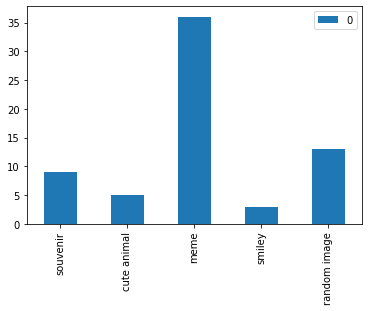

In [52]:
df.plot(kind='bar')

## Objective 2 _(if present)_
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3 _(if present)_
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections.__

### Acheivements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._

# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [56]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL

60